In [12]:
CLEANED_SAVE_PATH = "../cleaned_tweet_data.csv"

In [13]:
import pandas as pd
from wordcloud import STOPWORDS,WordCloud

In [16]:
def read_proccessed_data(csv_path):
    return df

In [21]:
df = read_proccessed_data(CLEANED_SAVE_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      6532 non-null   int64  
 7   retweet_count       4785 non-null   float64
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
 15  friends_count       6532 non-null   float64
 16  clean_

In [22]:
df = read_proccessed_data(CLEANED_SAVE_PATH)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   polarity            6532 non-null   float64
 4   subjectivity        6532 non-null   float64
 5   lang                6532 non-null   object 
 6   favorite_count      6532 non-null   int64  
 7   retweet_count       4785 non-null   float64
 8   original_author     6532 non-null   object 
 9   followers_count     6532 non-null   int64  
 10  friends_count       6532 non-null   int64  
 11  possibly_sensitive  0 non-null      float64
 12  hashtags            6532 non-null   object 
 13  user_mentions       6532 non-null   object 
 14  place               4088 non-null   object 
 15  friends_count       6532 non-null   float64
 16  clean_

In [23]:
df['polarity']
df['polarity'].value_counts()

 0.000000    1829
-0.750000     501
 0.500000     210
 0.133333     201
 0.337500     189
             ... 
-0.190625       1
-0.035714       1
-0.175000       1
 0.186111       1
-0.055556       1
Name: polarity, Length: 401, dtype: int64

In [24]:
text_null_sum = df['clean_text'].isnull().sum()
polarity_null_sum = df['polarity'].isnull().sum()

print(f'sum of null values in clean_text column: {text_null_sum}')
print(f'sum of null values in polarity cloumn: {polarity_null_sum}')

sum of null values in clean_text column: 0
sum of null values in polarity cloumn: 0


In [25]:
cleanedTweet = pd.DataFrame(columns=['clean_text','polarity'])

cleanedTweet['clean_text'] = df['clean_text']
cleanedTweet['polarity'] = df['polarity']
cleanedTweet.dropna(inplace=True)

In [26]:
cleanedTweet

,clean_text,polarity
0,"🚨africa is ""in the midst of a full-blown third...",0.166667
1,"dr moeti is head of who in africa, and one of ...",0.133333
2,thank you for creating this amazing campaign ...,0.316667
3,"former pfizer vp and virologist, dr. michael y...",0.086111
4,i think it’s important that we don’t sell cova...,0.280000
...,...,...
6527,rt : zweli please just release the graphic des...,0.000000
6528,"former pfizer vp and virologist, dr. michael y...",0.086111
6529,"respectfully, veterinarians have to have a b...",0.281250
6530,"""africa needs millions more doses here &amp; n...",0.125000


In [27]:
def text_category(p: float) -> str:
    if p > 0:
        return "positive"
    elif p == 0:
        return "neutral"
    else:
        return "negative"

In [28]:
cleanedTweet['score'] = cleanedTweet['polarity'].apply(text_category)
cleanedTweet['score'].value_counts()

positive    3426
neutral     1829
negative    1277
Name: score, dtype: int64

<AxesSubplot:title={'center':'score'}>

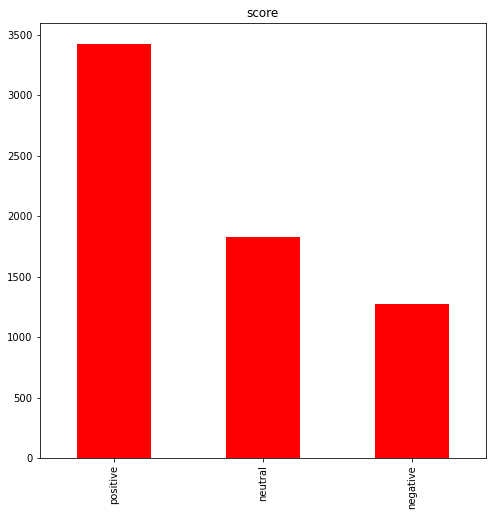

In [33]:
score_count =  cleanedTweet['score'].value_counts()
score_count.plot(kind="bar", y="score", title="score", figsize=[8, 8], color = "red")

<AxesSubplot:title={'center':'score'}, ylabel='score'>

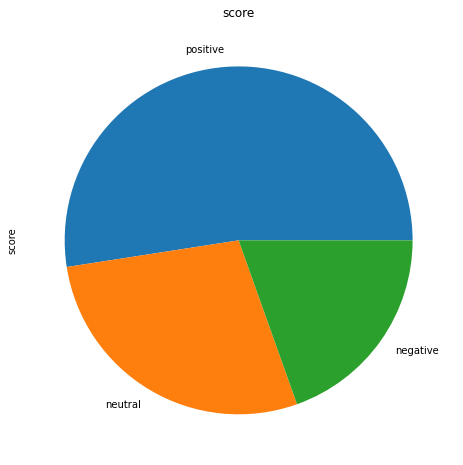

In [36]:
score_count.plot(kind="pie", y="score", title="score", x="", figsize=[8, 8],)

In [37]:
def remove_neutral(value):
    return value != "neutral"

In [38]:
cleanedTweet = cleanedTweet[cleanedTweet['score'].map(remove_neutral)]
cleanedTweet['score_map'] = cleanedTweet["score"].map( lambda score: 1 if score == "positive" else 0)

<ipython-input-38-8d4db6a1bade>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedTweet['score_map'] = cleanedTweet["score"].map( lambda score: 1 if score == "positive" else 0)


In [39]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from joblib import dump, load # used for saving and loading sklearn objects
from scipy.sparse import save_npz, load_npz # used for saving and loading sparse matrices
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

In [40]:
(X, y) = cleanedTweet['clean_text'], cleanedTweet['score_map']

In [41]:
trigram_vectorizer = CountVectorizer(ngram_range=(1, 3))
trigram_vectorizer.fit(X.values)

CountVectorizer(ngram_range=(1, 3))

In [43]:
X_trigram = trigram_vectorizer.transform(X.values)
trigram_tf_idf_transformer = TfidfTransformer()
trigram_tf_idf_transformer.fit(X_trigram)

TfidfTransformer()

In [44]:
X_train_tf_idf = trigram_tf_idf_transformer.transform(X_trigram)

In [45]:
def train_and_show_scores(X, y, title: str) -> None:
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, train_size=0.75, stratify=y
    )

    clf = SGDClassifier()
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    valid_score = clf.score(X_valid, y_valid)
    print(f'{title}\nTrain score: {round(train_score, 2)} ; Validation score: {round(valid_score, 2)}\n')

In [46]:
train_and_show_scores(X_trigram, y, title="trigram")

trigram
Train score: 1.0 ; Validation score: 0.96



In [47]:
train_and_show_scores(X_train_tf_idf, y, title="trigram_tf_idf")

trigram_tf_idf
Train score: 1.0 ; Validation score: 0.96



In [49]:
import string
import gensim
from gensim.models import CoherenceModel
from gensim import corpora

C:\Users\Betelhem\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [50]:
class TopicModel:
    
    def __init__(self, tweet_df):
        self.df = tweet_df
    
    def extract_text_df(self):
        self.df = pd.DataFrame(self.df['clean_text']) 
        
        return self.df
    
    def further_pre_process(self):
        
        self.df['clean_text']= df['clean_text'].apply(lambda x: str(x).translate(str.maketrans(' ', ' ', string.punctuation))) 
        
        return self.df
    
    def prepare_inputs(self):
        
        df = self.extract_text_df()
        df = self.further_pre_process()
        
        sentence_list = [text for text in self.df['clean_text']]
        word_list = [sent.split() for sent in sentence_list]
        word_to_int = corpora.Dictionary(word_list)
        corpus = [word_to_int.doc2bow(tweet) for tweet in word_list]
        
        return word_list, word_to_int, corpus
        
        
            
    def build(self):
        word_list, word_to_int, corpus = self.prepare_inputs()
        lda_model = gensim.models.ldamodel.LdaModel(
            corpus, id2word=word_to_int,num_topics=5, 
            random_state=100, update_every=1, 
            chunksize=100, passes=10, alpha='auto',
            per_word_topics=True
        )

In [51]:
df = read_proccessed_data(CLEANED_SAVE_PATH)
tm = TopicModel(df)
print(tm.build())

None
